# Pokrycia i rekursja

W tym rozdziale będziemy badać w jaki sposób stosując opis wektorowy, procedury rekurencyjne generować fraktalne struktury. SageMath jest do tego doskonałym narzędziem, w którym możemy łączyć matematyczne formuły z grafiką.

## Przykład -1

Wygeneruj sekwencję równobocznych trójkątów, których długość boków maleje i zmienia się kolor wraz z nieznaczną zmianą kąta wokół wspólnego centrum.

In [1]:
#R.<x>=QQ[]
#f=x^3-1;
#roo=f.roots(CC)
#r=[x[0] for x in roo]
def Triangle(pos,rot,scale,col):
    r0=[1.00000000000000,-0.500000000000000 - 0.866025403784439*I,-0.500000000000000 + 0.866025403784439*I]
    r=[scale*x for x in r0]
    return polygon([((CC(pos)+rot*r[i]).real_part(),(CC(pos)+rot*r[i]).imag_part()) for i in [0..2]],color=col,axes=False)

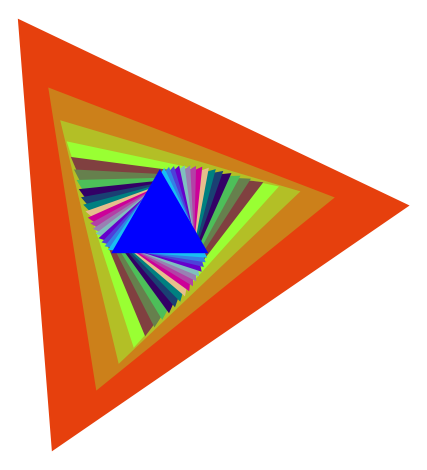

In [2]:
gra=Graphics()
N=20
for i in [1..N]:
    gra=gra+Triangle(0,cos(pi*i/(2*N))+I*sin(pi*i/(2*N)),N/(sqrt(i)),Color(1-i/(N/2),i/(N/5),i/N))
    
show(gra)

In [3]:
gra=Graphics()
N=20
for i in [0..N]:
    gra=gra+Triangle(i^(1.3)/N,cos(pi*i/(2*N))+I*sin(pi*i/(2*N)),N/(sqrt(i+1)),Color(i/(N/2),i/(N/5),i/N))
    
show(gra)

Cały proces możemy uogólnić do generowania w podobny sposób dowolnych wielokątów foremnych.

In [4]:
def NGon(pos,rot,scale,col,n):
    r0=[CC(exp(2*pi*I*k/n)) for k in [0..(n-1)]]
    r=[scale*x for x in r0]
    return polygon([((CC(pos)+rot*r[i]).real_part(),(CC(pos)+rot*r[i]).imag_part()) for i in [0..len(r0)-1]],color=col,axes=False)

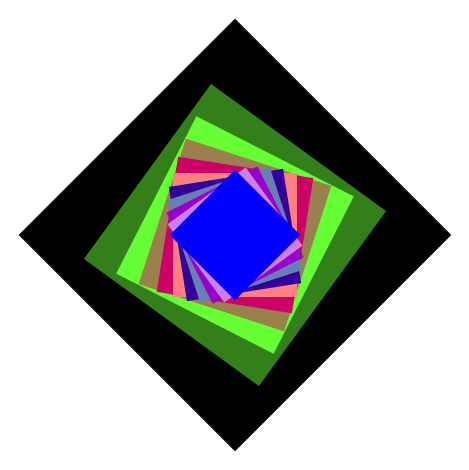

In [5]:
gra=Graphics()
N=10
for i in [0..N]:
    gra=gra+NGon(0,cos(pi*i/(2*N))+I*sin(pi*i/(2*N)),N/(sqrt(i+1)),Color(i/(N/2),i/(N/5),i/N),4)
    
show(gra)

In [6]:
gra=Graphics()
N=30
for i in [0..N]:
    gra=gra+NGon(0,cos(pi*i/(2*N))+I*sin(pi*i/(2*N)),N/(sqrt(i+1)),Color(1-i/(N/2),i/(N/5),i/N),6)
    
show(gra)


## Przykład 0

Pokafelkuj płaszczyznę trójkątami równobocznymi (czerwone  i czarne).

Pokafelkuj płaszczyznę sześciokątami foremnymi (niebieskie, zielone i czerwone).

Zadbaj o to, aby sąsiadujące figury miały różny kolor

Wskazówki:
1. W jaki sposób zainicjalizować pozycje trójkątów? (załóż, że trójkąt jest np. wpisany w okrąg jednostkowy, wygeneruj przesunięcia względem odpowiedniej kraty).
2. W jaki sposob zainicjalizować pozycje sześciokątów? (skorzystaj z opisu kraty typu plaster miodu).

### Pierwsze podejście:

In [7]:
(exp(2*pi*I/3)-1).norm().sqrt() #to jest długość boku trójkąta równobocznego, który będziemy wykorzystywać; musimy wyskalować przez tę liczbę

sqrt(3)

### Teselacja trójkątami

In [8]:
gra=Graphics()
for k in [-5..5]:
    for j in [-3..3]:
        gra=gra+Triangle(sqrt(3)*(k+j*exp(2*pi*I/6)),CC(exp(pi*I*3/6)),1,Color(1,0,0))
        gra=gra+Triangle(sqrt(3)*(k+j*exp(2*pi*I/6))+exp(pi*I/6),CC(exp(pi*I*5/6)),1,Color(0,0,0))
        
show(gra,xmin=-5,xmax=5,ymin=-5,ymax=5)

### Teselacja sześciokątami

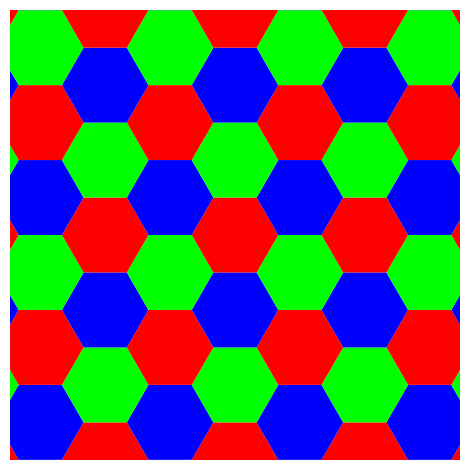

In [9]:
def Color1(n):
    if n==0:
        return Color(1,0,0)
    if n==1:
        return Color(0,1,0)
    if n==2:
        return Color(0,0,1)
gra=Graphics()
for k in [-5..5]:
    for j in [-5..5]:
        gra=gra+NGon(sqrt(3)*(k*I+j*exp(2*pi*I/12)),1,1,Color1((k-j)%3),6)
        
show(gra,xmin=-5,xmax=5,ymin=-5,ymax=5)

### Przykład 1

Używając dwóch kolorów (czerwony i biały) wygeneruj wzorzec trójkątów, w którym w każdej iteracji wycinamy 1/4 powierzchni trójkąta równobocznego. W następnym kroku zagnieźć obraz wewnątrz poprzedniego w odpowiedniej skali.

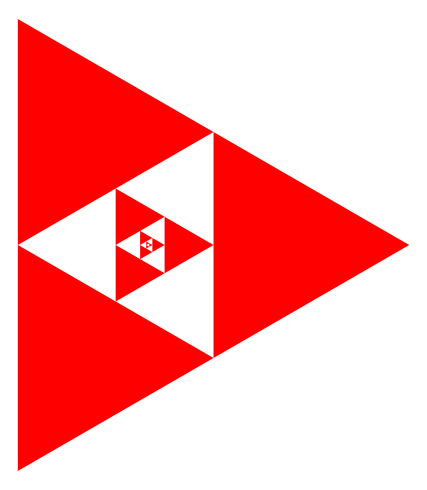

In [10]:
R.<x>=QQ[]
f=x^3-1;
roo=f.roots(CC)
r=[x[0] for x in roo]
def Fig1(sc,rot):
    return Triangle(r[1]/sc,rot,1/sc,"red")+Triangle(r[2]/sc,rot,1/sc,"red")+Triangle(r[0]/sc,rot,1/sc,"red")

def T(k,gra):
    if (k==0):
        return gra
    else:
        gra=gra+Fig1(4^k,1)
        k=k-1
        return T(k,gra)
#show(Fig1(1,1)+Fig1(4,1),figsize=[10,10])
gra0=Graphics()
show(T(4,gra0),figsize=[5,5])

### Przykład 2

Wstaw niebieskie trójkąty w miejsca puste poprzedniej ilustracji.

In [11]:
R.<x>=QQ[]
f=x^3-1;
roo=f.roots(CC)
r=[x[0] for x in roo]
def Fig1(sc,rot, c):
    t1 = Triangle(r[1]/sc, rot, 1/sc, c)
    t2 = Triangle(r[2]/sc, rot, 1/sc, c)
    t3 = Triangle(r[0]/sc, rot, 1/sc, c)
    return t1 + t2 + t3
def Fig2(sc,rot, c):
    t1 = Triangle((r[1] + r[2])/sc, rot, 1/sc, c)
    t2 = Triangle((r[2] + r[0])/sc, rot, 1/sc, c)
    t3 = Triangle((r[0] + r[1])/sc, rot, 1/sc, c)
    return t1 + t2 + t3
def T(k,gra):
    if (k==0):
        return gra
    else:        
        gra = gra + Fig1(4 ** k, 1, "red")
        gra = gra + Fig2(4 ** k * 2, -1, "blue")
        k -= 1
        return T(k,gra)

#show(Fig1(1,1)+Fig1(4,1),figsize=[10,10])
gra0=Graphics()
show(T(4,gra0),figsize=[5,5])

### Zadanie:

Wygeneruj podobny wzorze oparty na białych i czerwonych kwadratach.